In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from tqdm.auto import tqdm

## Data

In [27]:
df_train = pd.read_csv('data/train.csv', index_col=0)
df_test = pd.read_csv('data/test.csv', index_col=0)

In [28]:
df_train['tt'] = 'train'
df_test['tt'] = 'test'

In [29]:
df = pd.concat([df_train,df_test])

## Feature Creation

In [31]:
df['dateTime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])

In [35]:
df = df.set_index('dateTime')

In [40]:
df['dayofyear'] = df.index.dayofyear

In [120]:
df_coef = df_train.drop(columns={'tt'}).groupby('dayofyear').mean()[['surfaceHeight']]
df_train['coef1'] = 0 
for i in tqdm(range(df_coef.shape[0])):
    df_train.loc[df_train['dayofyear']==i,'coef'] = df_coef.reset_index().loc[i,'surfaceHeight']

  0%|          | 0/366 [00:00<?, ?it/s]

<Axes: xlabel='dayofyear', ylabel='coef'>

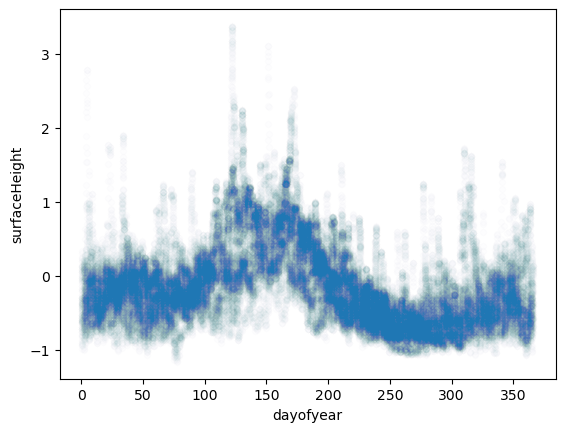

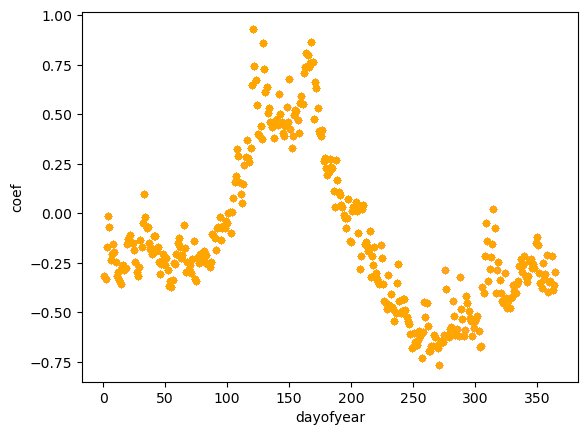

In [127]:
df_train.plot.scatter('dayofyear','surfaceHeight',alpha=0.008)
df_train.plot.scatter('dayofyear','coef',alpha=0.008,color='orange')

## Plotting

<Axes: xlabel='dateTime'>

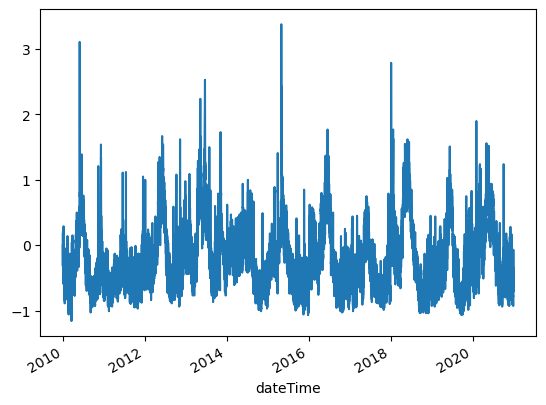

In [39]:
df['surfaceHeight'].plot()

<Axes: xlabel='dayofyear', ylabel='surfaceHeight'>

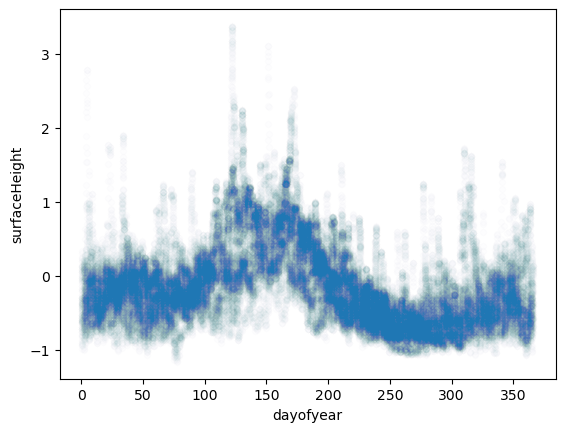

In [44]:
df.plot.scatter('dayofyear','surfaceHeight',alpha=0.008)

## Linear model

In [45]:
model = LinearRegression()

In [64]:
df_train = df.loc[df['tt']=='train']

In [128]:
df_train = df_train.dropna()

In [129]:
df_train

,year,month,day,hour,minute,surfaceHeight,tt,dayofyear,coef1,coef
dateTime,,,,,,,,,,
2010-01-01 00:12:00,2010,1,1,0,12,0.00,train,1,0,-0.316848
2010-01-01 00:59:00,2010,1,1,0,59,-0.03,train,1,0,-0.316848
2010-01-01 01:15:00,2010,1,1,1,15,-0.05,train,1,0,-0.316848
2010-01-01 01:18:00,2010,1,1,1,18,-0.07,train,1,0,-0.316848
2010-01-01 01:42:00,2010,1,1,1,42,-0.07,train,1,0,-0.316848
...,...,...,...,...,...,...,...,...,...,...
2020-12-30 14:48:00,2020,12,30,14,48,-0.70,train,365,0,-0.296400
2020-12-30 16:03:00,2020,12,30,16,3,-0.71,train,365,0,-0.296400
2020-12-30 16:23:00,2020,12,30,16,23,-0.71,train,365,0,-0.296400


In [174]:
X_train = df_train[['year', 'month', 'day', 'hour', 'minute','coef','dayofyear']].loc[df_train['year']<2017]
y_train = df_train['surfaceHeight'].loc[df_train['year']<2017]

X_test = df_train[['year', 'month', 'day', 'hour', 'minute','coef','dayofyear']].loc[df_train['year']>=2017]
y_test = df_train['surfaceHeight'].loc[df_train['year']>=2017]

In [160]:
model.fit(X_train,y_train)

LinearRegression()

In [161]:
y_predict = model.predict(X_test)

<Axes: xlabel='dateTime'>

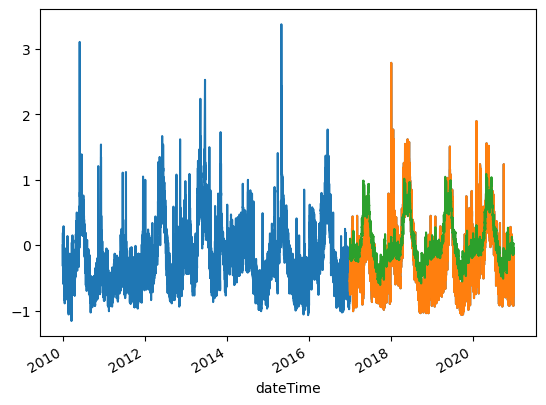

In [162]:
X_test['prediction'] = model.predict(X_test)
X_test['surfaceHeight'] = y_test

df_train['surfaceHeight'].plot()
X_test['surfaceHeight'].plot()
X_test['prediction'].plot()

<Axes: xlabel='dayofyear', ylabel='prediction'>

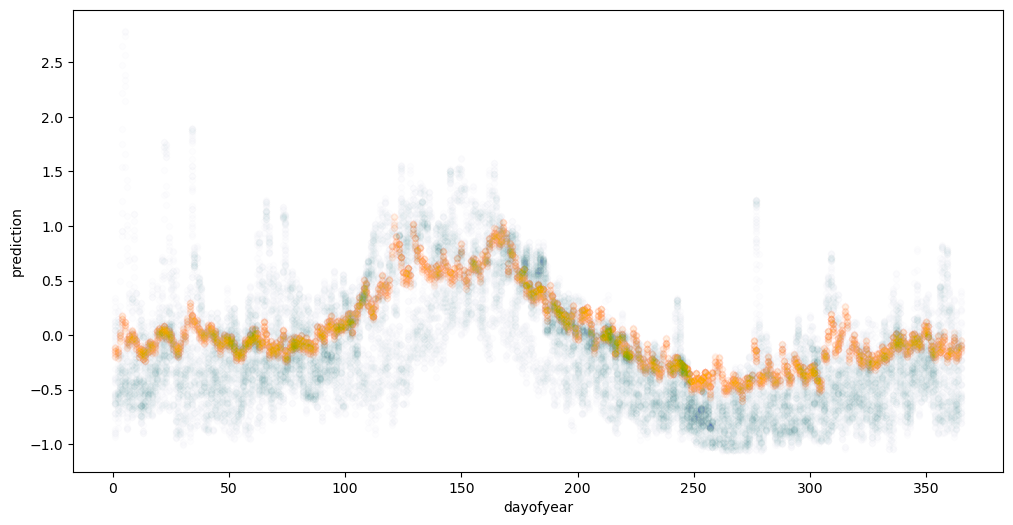

In [138]:
plt.figure(figsize=(12,6))
ax = plt.axes()
X_test.plot.scatter('dayofyear','surfaceHeight',alpha=0.008,ax=ax)
X_test.plot.scatter('dayofyear','prediction',alpha=0.008,ax=ax,color='orange')

## Decision tree

In [170]:
model2 = DecisionTreeRegressor()

model2.fit(X_train,y_train)

y_predict2 = model2.predict(X_test)

<Axes: xlabel='dateTime'>

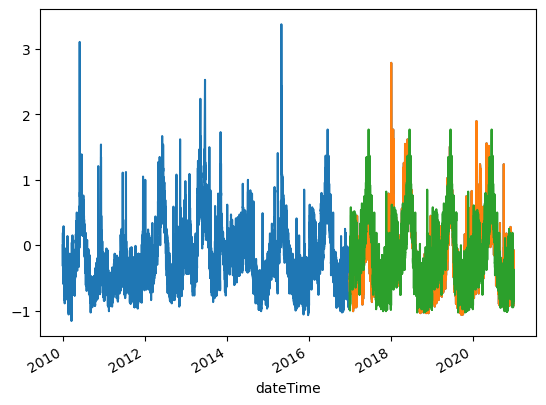

In [171]:
X_test['prediction2'] = model2.predict(X_test)
X_test['surfaceHeight'] = y_test

df_train['surfaceHeight'].plot()
X_test['surfaceHeight'].plot()
X_test['prediction2'].plot()

<Axes: xlabel='dayofyear', ylabel='prediction2'>

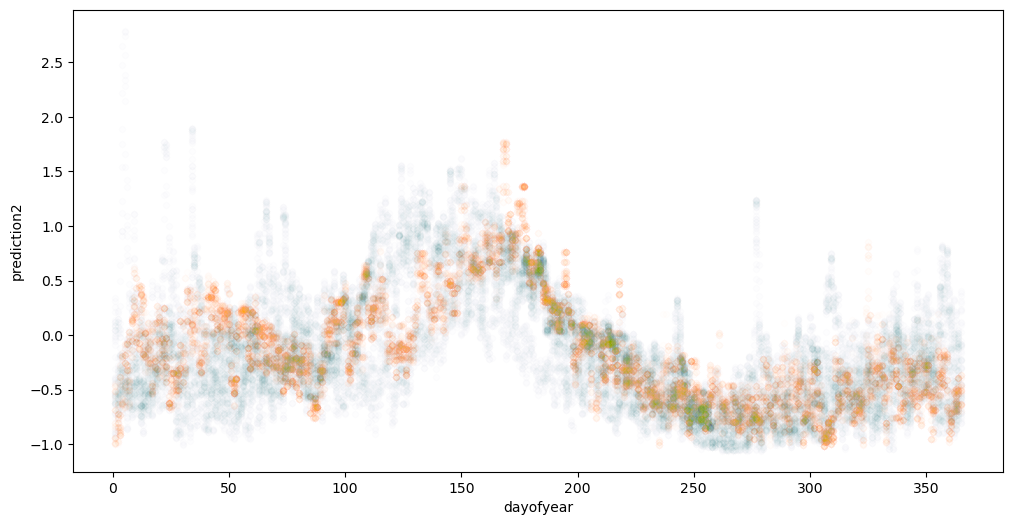

In [148]:
plt.figure(figsize=(12,6))
ax = plt.axes()
X_test.plot.scatter('dayofyear','surfaceHeight',alpha=0.008,ax=ax)
X_test.plot.scatter('dayofyear','prediction2',alpha=0.008,ax=ax,color='orange')

In [163]:
MAE1 = np.mean(np.sqrt(abs(y_predict-y_test)))

In [172]:
MAE2 = np.mean(np.sqrt(abs(y_predict2-y_test)))

In [173]:
print(MAE1,MAE2)

0.5267727240955231 0.5374951298877332


## Model XGboost